# Загрузка датасета и первый взгляд

In [ ]:
!mkdir data
!wget https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem8/zhestov.ea%40phystech.edu.csv -O data/zhestov.ea@phystech.edu.csv

--2021-04-03 13:44:24--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem8/zhestov.ea%40phystech.edu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 280043 (273K) [text/plain]
Saving to: ‘data/zhestov.ea@phystech.edu.csv’

data/zhestov.ea@phy 100%[===================>] 273.48K  --.-KB/s    in 0.01s   

2021-04-03 13:44:25 (26.9 MB/s) - ‘data/zhestov.ea@phystech.edu.csv’ saved [280043/280043]



In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [ ]:
data = pd.read_csv('data/zhestov.ea@phystech.edu.csv', header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,-1.761398,-0.156257,-0.005979,0.860942,0.091872,-0.331193,0.749937,0.019989,0.032373,0.319947
1,0.0,-1.303103,0.387844,-1.128526,1.457206,0.812469,-0.022561,-2.500210,-1.444416,-0.235715,0.925951
2,0.0,-0.249461,1.443965,0.620882,0.470192,0.988734,0.028974,-0.640343,-0.405336,0.084876,0.031681
3,0.0,-0.230755,-0.765686,1.712833,-0.874092,0.423669,-1.889826,0.014605,-0.661475,0.213601,1.189151
4,0.0,0.526141,1.154553,-1.136941,-0.689502,0.684815,0.901370,-1.486596,-0.721248,0.468192,2.423638


In [ ]:
column_names = list(map(lambda num: f"X{num - 1}", data.columns))
column_names[0] = 'Y'
column_names
data.columns = column_names
data.describe()

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.474000,0.072231,-0.051437,-0.060313,0.032660,0.006941,-0.024947,0.006426,-0.028679,-0.020293,-0.026283
std,0.499573,1.016500,0.998119,0.983231,1.005172,0.993745,0.991906,0.998349,0.961597,1.003385,0.991686
min,0.000000,-3.130053,-3.287880,-2.842902,-2.870782,-2.696203,-3.949313,-2.933166,-3.370755,-3.420011,-3.275969
25%,0.000000,-0.622599,-0.753558,-0.709180,-0.669469,-0.667142,-0.732571,-0.644894,-0.649648,-0.690803,-0.688340
50%,0.000000,0.071710,-0.058918,-0.022007,0.035155,0.002624,-0.052348,0.013527,0.001218,-0.042588,-0.005404
75%,1.000000,0.775350,0.649182,0.604349,0.697111,0.669500,0.693689,0.745126,0.625735,0.671355,0.647797
max,1.000000,3.058372,3.327818,2.980125,3.318213,3.409064,3.167181,2.965234,3.022946,2.980623,3.057821


In [ ]:
X = data.drop('Y', axis=1)
y = data['Y']
print(X.shape, y.shape)

(1000, 10) (1000,)


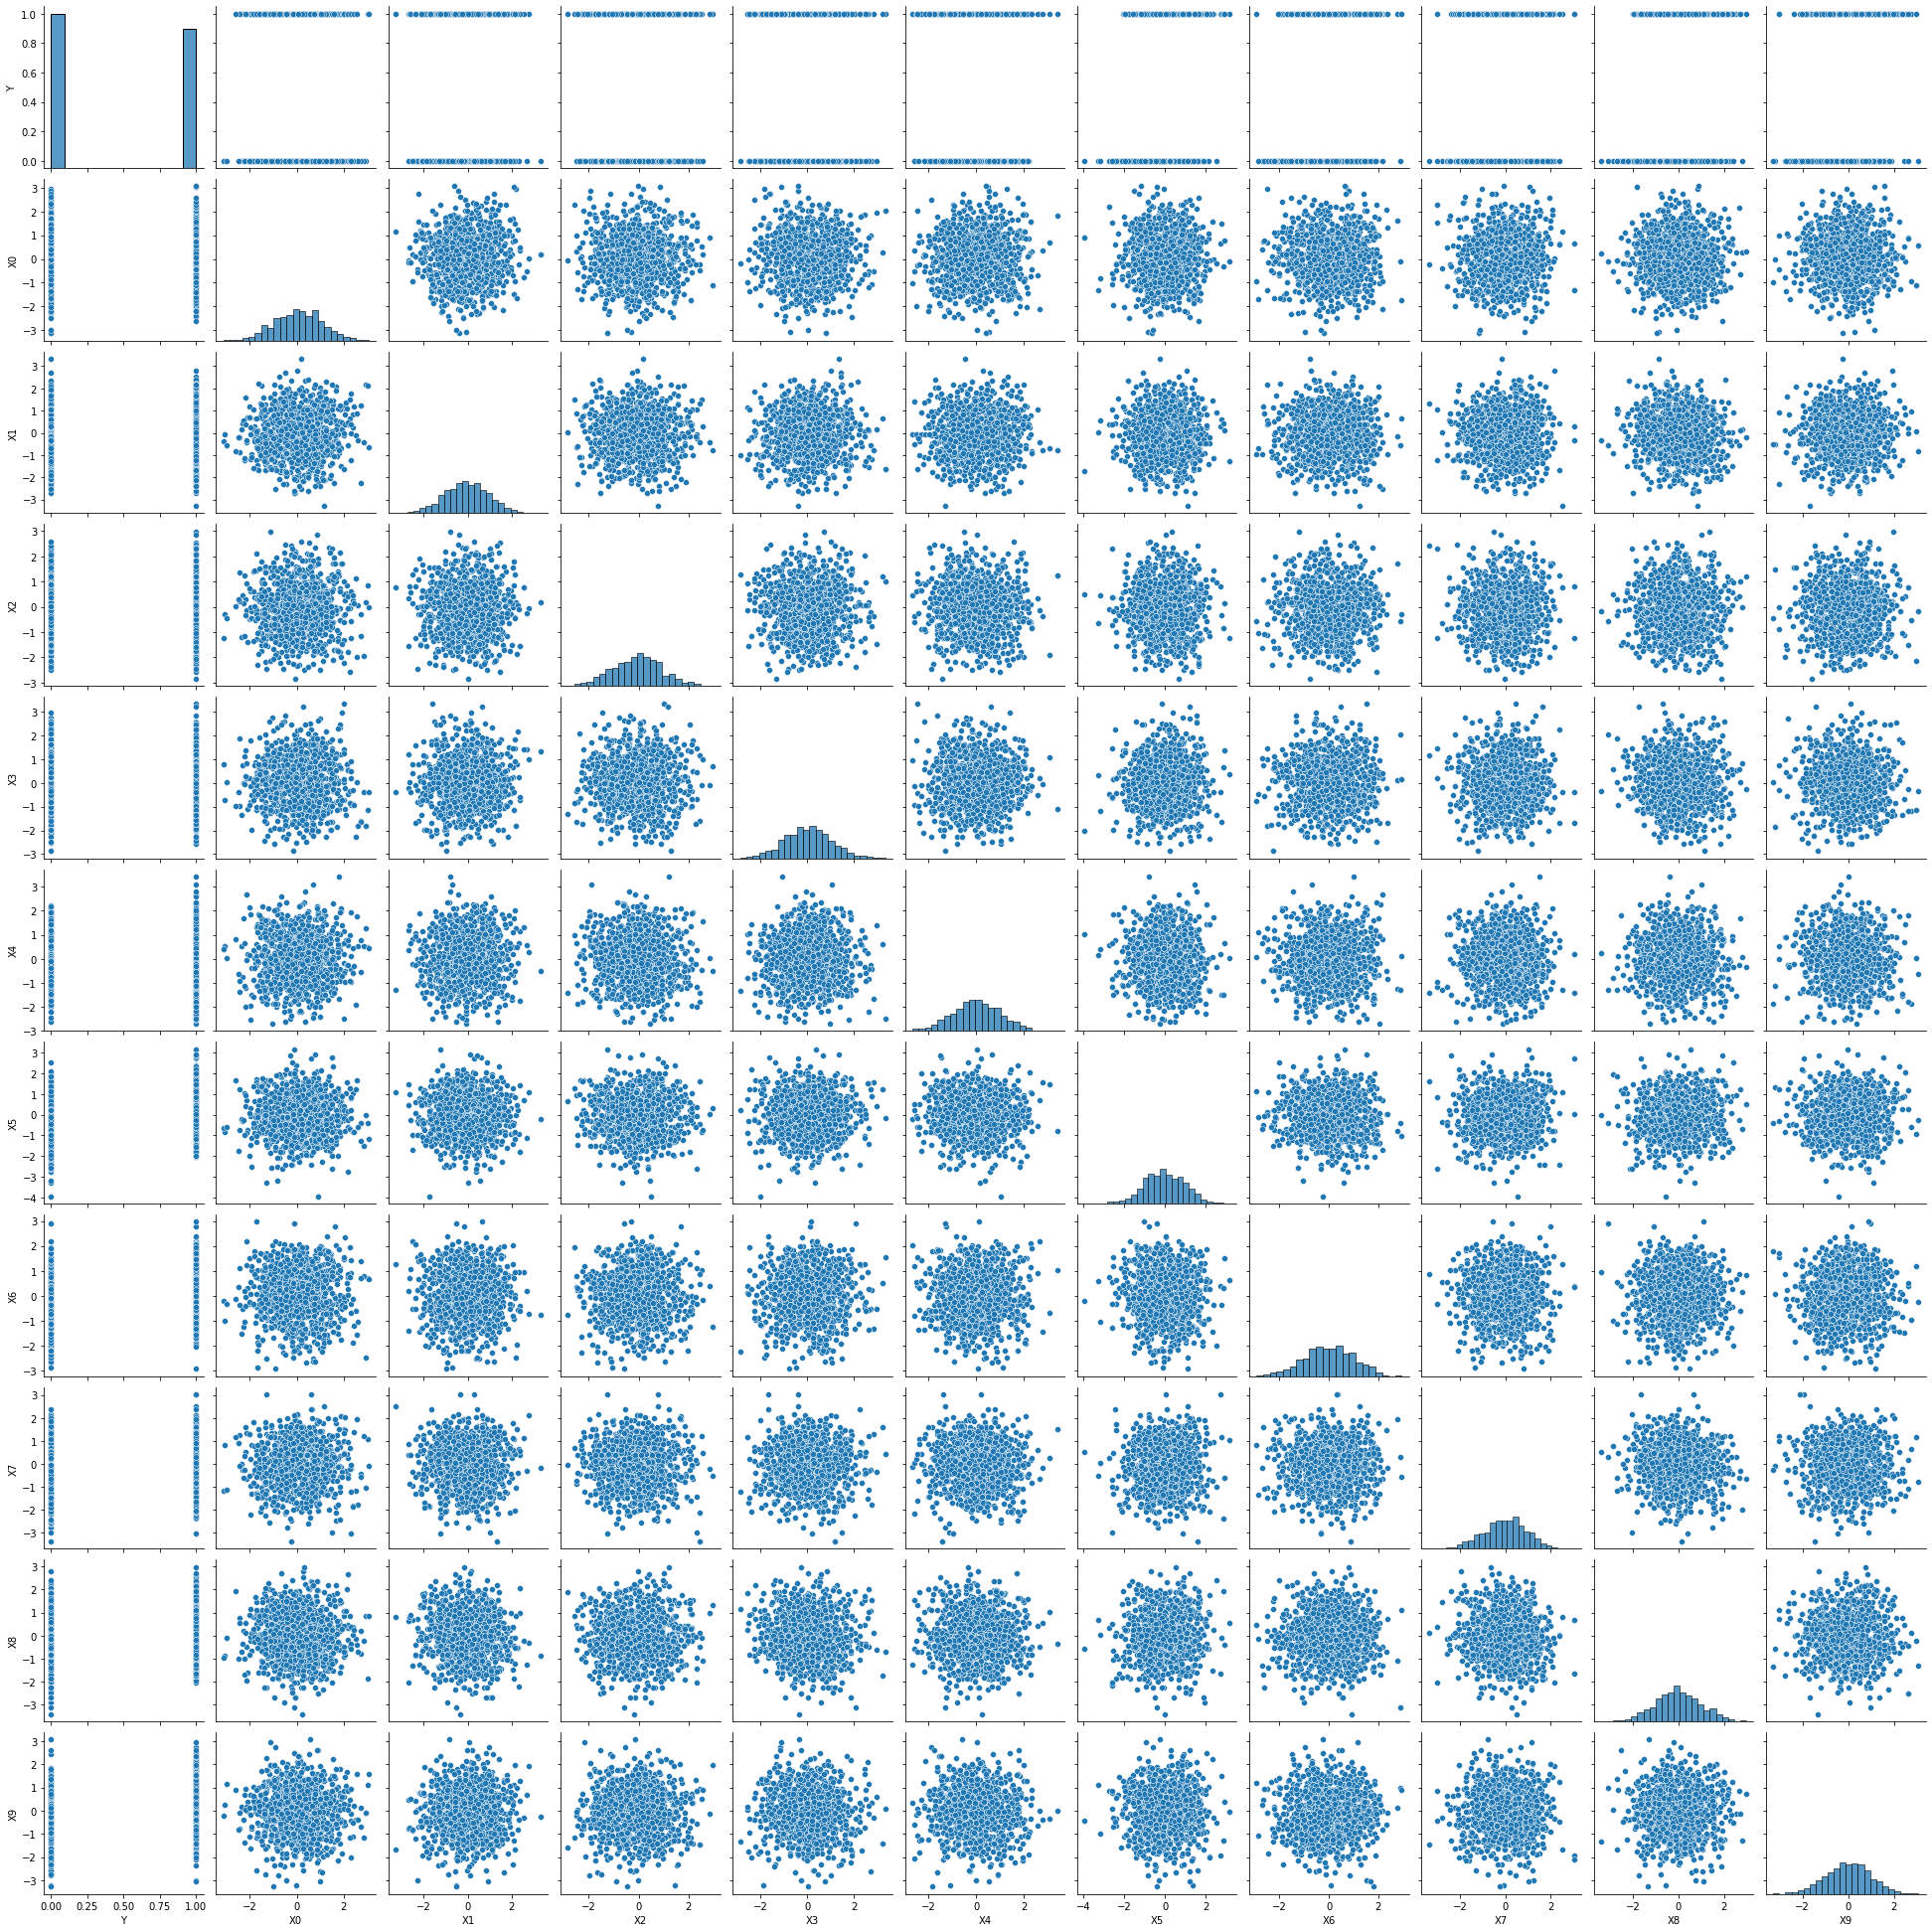

In [ ]:
sns.pairplot(data)

Я бы использовал тут `Probit`, ибо данные явно нормальные, но логит так логит, чё нам

# Задание
## Вопрос 1
Постройте модель логистической регрессии $Y$ от $X$ и свободного коэффициента. Каково отношение шансов $Y=1$ к событию $f(X) = 1$, где $f(X)$ - отклик?

In [ ]:
logit_model = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.341465
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Sat, 03 Apr 2021   Pseudo R-squ.:                  0.5064
Time:                        14:06:13   Log-Likelihood:                -341.46
converged:                       True   LL-Null:                       -691.79
Covariance Type:            nonrobust   LLR p-value:                4.534e-144
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1498      0.098     -1.524      0.127      -0.342       0.043
X0            -0.1269      0.096     -1.326      0.185      -0.315       0.061
X1             0.0071      0.096      0.074      0.941      -0.182       0.196
X2             0.0358      0.097      0.370      0.711      -0.154       0.225
X3            -0.0106      0.095     -0.111      0.911      -0.197       0.176
X4             0.0638      0.096      0.663      0.507      -0.125       0.252
X5             1.4756      0.129     11.421      0.000       1.222       1.729
X6             1.4502      0.126     11.554      0.000       1.204       1.696
X7             1.2688      0.125     10.115      0.000       1.023       1.515
X8             1.4103      0.124     11.396      0.000       1.168       1.653
X9             1.5051      0.128     11.740      0.000       1.254       1.756
==============================================================================
"""

Видимо тут хотят одну дробь делить на другую дробь, что странновато, но ладно.

In [ ]:
y.sum()

474.0

In [ ]:
import numpy as np
np.exp(logit_model.params)

const    0.860893
X0       0.880782
X1       1.007126
X2       1.036445
X3       0.989473
X4       1.065835
X5       4.373517
X6       4.264158
X7       3.556430
X8       4.097173
X9       4.504535
dtype: float64

Андрей сказал, что тут от нас требуют штуку под названием *Odds ratio*

In [ ]:
p_endog = y.sum()
p_endog_normed = p_endog / len(y)
f = logit_model.predict(sm.add_constant(X))
response = list(map(round, f))
p_resp = len(list(filter(lambda x: x == 1, response)))
p_resp_normed = p_resp / len(response)
OR = (p_endog_normed / (1 - p_endog_normed)) * ((1 - p_resp_normed) / p_resp_normed)

In [ ]:
np.round(OR, decimals=2)

1.0

## Вопрос 2
Какова точность (Accuracy) классификации модели при пороге вероятности для классификации $p_0 = 0.5$?

In [ ]:
np.round(accuracy_score(y, response), decimals=2)

0.84

## Вопрос 3
Постройте модель логистической регрессии $Y$ от $X$ и свободного коэффициента для первых $200$ элементов выборки. Имеет ли смысл данная модель согласно критерию Вальда? (p-value$=0.05$)

In [ ]:
X = X[0:100]
y = y[0:100]

In [ ]:
new_model = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()
new_model.summary()

Optimization terminated successfully.
         Current function value: 0.277820
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       89
Method:                           MLE   Df Model:                           10
Date:                Sat, 03 Apr 2021   Pseudo R-squ.:                  0.5816
Time:                        14:49:07   Log-Likelihood:                -27.782
converged:                       True   LL-Null:                       -66.406
Covariance Type:            nonrobust   LLR p-value:                 1.734e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4226      0.366     -1.154      0.249      -1.141       0.295
X0            -0.9025      0.425     -2.126      0.034      -1.734      -0.070
X1            -0.0925      0.465     -0.199      0.842      -1.003       0.818
X2            -0.2189      0.434     -0.504      0.614      -1.070       0.632
X3             0.2422      0.474      0.511      0.609      -0.687       1.171
X4            -0.3476      0.343     -1.013      0.311      -1.020       0.325
X5             2.0257      0.577      3.509      0.000       0.894       3.157
X6             2.0828      0.524      3.975      0.000       1.056       3.110
X7             2.1834      0.642      3.403      0.001       0.926       3.441
X8             1.3712      0.508      2.697      0.007       0.375       2.367
X9             1.8431      0.564      3.270      0.001       0.738       2.948
==============================================================================
"""

In [ ]:
from functools import reduce

string = reduce(lambda x, a: a + x, reversed(' = '.join(map(lambda x: f'X{x}', range(10)))))
string = 'const = ' + string

In [ ]:
new_model.wald_test(string).summary()

'<Wald test (chi2): statistic=[[20.01508709]], p-value=0.029110312111393796, df_denom=10>'

Модель имеет смысл, ибо нулевая гипотеза о том, что все переменные = 0 имеет pvalue меньше 0.05

## Вопрос 4
Можно ли обнулить первые четыре переменные согласно критерию Вальда? (p-value$=0.05$)

In [ ]:
string = reduce(lambda x, a: a + x, reversed(' = '.join(map(lambda x: f'X{x}', range(4)))))

In [ ]:
new_model.wald_test(string).summary()

'<Wald test (chi2): statistic=[[3.40630123]], p-value=0.33311940363083453, df_denom=3>'

Нельзя обнулить, ибо нулевая гипотеза, что первые 4 переменные равны нулю, имеет pvalue больше $0.05$